## Part A: Model Code

#### A(1). Write a function to calculate and return the Euclidean distance of two vectors.

In [2]:
def euclidean_distance(xVec, yVec):
    if len(xVec) == len(yVec):
        output = 0
        for i in range(len(xVec)-1):
            output += (xVec[i] - yVec[i])**2
        output = np.sqrt(output)
        return output
    else:
        return "Error: vectors are of different dinmentsions!"

#### A(2). Write a function to calculate and return the manhattam distance of two vectors.

In [3]:
def manhattan_distance(xVec, yVec):
    if len(xVec) == len(yVec):
        output = 0
        for i in range(len(xVec)-1):
            output += abs(xVec[i] - yVec[i])
        return output
    else:
        return "Error: vectors are of different dinmentsions!"


#### A(3). Write a function to calculate and return the accuracy and generalization of two vectors.

In [4]:
def accuracy_generalization(predVec, trueVec):
    # Accuracy = tp+tn/total
    if len(predVec) == len(trueVec):
        true_positive = 0
        true_negative = 0
        for i in range(len(predVec)):
                if predVec[i] == 1 and trueVec[i] == 1:
                    true_positive +=1
                elif predVec[i] == 0 and trueVec[i] == 0:
                    true_negative +=1
        return (true_positive+true_negative)/len(predVec)
        
    else:
        return "Error: vectors are of different dinmentsions!"

#### A(4). Write three functions to compute: precision, recall and F1 score.

In [5]:
def precision(predVec, trueVec):
    if len(predVec) == len(trueVec):
        true_positive = 0
        true_negative = 0
        false_positive = 0
        false_negative = 0
        for i in range(len(predVec)):
            if predVec[i] == 1 and trueVec[i] == 1:
                true_positive += 1
            elif predVec[i] == 0 and trueVec[i] == 0:
                true_negative += 1
            elif predVec[i] == 1 and trueVec[i] == 0:
                false_positive += 1
            elif predVec[i] == 0 and trueVec[i] == 1:
                false_negative += 1
        return true_positive / (true_positive + false_positive), true_positive / (true_positive + false_negative), true_positive / (true_positive + ((false_negative + false_positive) / 2))
    else:
        return "Error: vectors are of different dinmentsions!"

#### A(5). Write a function to compute the confusion matrix of two vectors.

In [48]:
def confusion_matrix(predVec, trueVec):
    if len(predVec) == len(trueVec):
        true_positive = 0
        true_negative = 0
        false_positive = 0
        false_negative = 0
        for i in range(len(predVec)):
            if predVec[i] == 1 and trueVec[i] == 1:
                true_positive += 1
            elif predVec[i] == 0 and trueVec[i] == 0:
                true_negative += 1
            elif predVec[i] == 1 and trueVec[i] == 0:
                false_positive += 1
            elif predVec[i] == 0 and trueVec[i] == 1:
                false_negative += 1
        conf_matrix = [true_negative, false_positive, false_negative, true_positive]
   #     print("      Predicted: NO ", "    Predicted: YES ")
   #     print(" ")
   #     print("Actual: NO     ",conf_matrix[0],"      ", conf_matrix[1])
   #     print(" ")
   #     print("Actual: YES     ",conf_matrix[2],"      ", conf_matrix[3])
   #     print(" ")

        return conf_matrix
    else:
        return "Error: vectors are of different dinmentsions!"
    # Pre
  #       N  Y
  #   N  TN  FP
# AC  Y  FN  TP
   

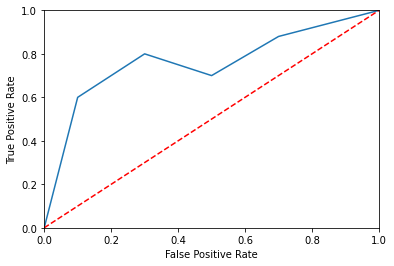

In [7]:
def roc(true_positive_rate, false_positive_rate):
    plt.plot(false_positive_rate, true_positive_rate)
    plt.plot([0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1], [0, .1, .2, .3, .4, .5, .6, .7, .8, .9, 1], color='red', linestyle='dashed')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.show()

#### A(7). Write a function to compute area under curve (AUC) for the ROC curve.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
array1 = [0.1,0.3,0.5,0.7]
array2 = [0.6,0.8,0.7,0.88]

def auc(true_positive_rate, false_positive_rate):
    auc = 0
    dis_ = []
    for i in range(len(false_positive_rate)-1):
        dis_.append(false_positive_rate[i+1]-false_positive_rate[i])
    dis_.append(1-false_positive_rate[len(false_positive_rate)-1])
    
    for element_in_y in range(len(true_positive_rate)):
        auc += dis_[element_in_y]*true_positive_rate[element_in_y]
    print('AUC is :', auc)
    return auc

auc(array2, array1)

AUC is : 0.684


0.684

#### A(8) [Extra Credit for 353 and Mandatory for 795] Write a function to generate the precisionrecall curve.

In [9]:
def precision_recall(recall, precision):
    x = [ 0, .1, .2, .3, .4, .5, .6, .7 ,.8, .9,1]
    plt.plot(x, recall, 'r', label = 'Recall') # plotting t, a separately 
    plt.plot(x, precision, 'b', label = 'Precision') # plotting t, b separately 
    plt.legend()
    plt.show()

#### A(9) Implement a KNN_Classifier model class.

In [10]:
class KNN_Classifier:
    def fit(self, X, Y, n_neighbors, weights, kwargs):
        
        # Store all the parameters for the classifier
        self.X = X  
        self.Y = Y  
        self.n_neighbors = n_neighbors 
        self.weights = weights 
        self.kwargs = kwargs 
        
    def predict(self, X):
        self.Z = X 
        prediction_list = []
        predicted_neighbors = []
        zero_count = 0
        one_count = 0
        confidence_interval = self.kwargs['confidence_interval']
        # Nested loop of the classifier 
        for test_row in self.Z:
            for train_row in self.X:
                # Classifier distance options
                if self.kwargs['distance'] == 'manhattan_distance':
                    dist = manhattan_distance(test_row, train_row)
                    prediction_list.append([dist, train_row[self.X.shape[1]-1]]) 
                    
                elif self.kwargs['distance'] == 'euclidean_distance':
                    dist = euclidean_distance(test_row, train_row)
                    prediction_list.append([dist, train_row[self.X.shape[1]-1]]) 
                    
            prediction_list.sort()
            prediction_list = prediction_list[:self.n_neighbors]
            
            # Classifier weights options
            if self.weights == 'distance':
                total = 0
                exception = 0
                pos = 0
                
                for i in range(self.n_neighbors):
                    if prediction_list[i][0] != 0:
                        prediction_list[i][0] = 1/prediction_list[i][0]
                        total += prediction_list[i][0]
                    else:
                        prediction_list[i][0] = 1/0.0001
                        total += prediction_list[i][0]
        
                for i in range(self.n_neighbors):
                    prediction_list[i][0] = prediction_list[i][0]/total
                    
                for i in range(self.n_neighbors):
                    if prediction_list[i][1] == 0:
                        zero_count += prediction_list[i][0]
                    else:
                        one_count += prediction_list[i][0]
                        
                if zero_count == 0:
                    predicted_neighbors.append(1)
                elif one_count== 0:
                    predicted_neighbors.append(0)
                elif zero_count/one_count >= confidence_interval:
                    predicted_neighbors.append(0)
                elif one_count/zero_count >= confidence_interval:
                    predicted_neighbors.append(1)

                zero_count = 0
                one_count = 0
                prediction_list = []    
                
            elif self.weights == 'uniform':
                for i in range(self.n_neighbors):
                    if prediction_list[i][1] == 0:
                        zero_count += 1
                    else:
                        one_count +=1
                
                if zero_count == 0:
                    predicted_neighbors.append(1)
                elif one_count == 0:
                    predicted_neighbors.append(0)
                elif zero_count/one_count >= confidence_interval:
                    predicted_neighbors.append(0)
                elif one_count/zero_count >= confidence_interval:
                    predicted_neighbors.append(1)
                    
                zero_count = 0
                one_count = 0
                prediction_list = []
                
        pre_array = np.array(predicted_neighbors)
        pre_array.shape = (len(predicted_neighbors), 1)
        
        return pre_array
    def __init__(self):
        pass

## Part B: Data Processing

In [11]:
import pandas as pd
df = pd.read_csv("winequality-white.csv", sep=";")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


#### B(11) The target will be the “quality” column which represents rating of wine and ranges from 3 t0 8.

In [12]:
df.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.435575
pH                      0.099427
sulphates               0.053678
free sulfur dioxide     0.008158
citric acid            -0.009209
residual sugar         -0.097577
fixed acidity          -0.113663
total sulfur dioxide   -0.174737
volatile acidity       -0.194723
chlorides              -0.209934
density                -0.307123
Name: quality, dtype: float64

In [13]:
df['quality'] = (df['quality'] > 5).astype(np.int)

#### B(12) Summarize each of the variables in the dataset in terms of mean, standard deviation, and quartiles

In [14]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,0.665169
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.471979
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,0.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,0.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,1.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,1.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,1.000000


#### B(13) Shuffle the rows of your data.

In [15]:
df = df.sample(frac=1)

#### B(14) Generate pair plots using the seaborn package. This will be used to identify and report the redundant features, if there is any.

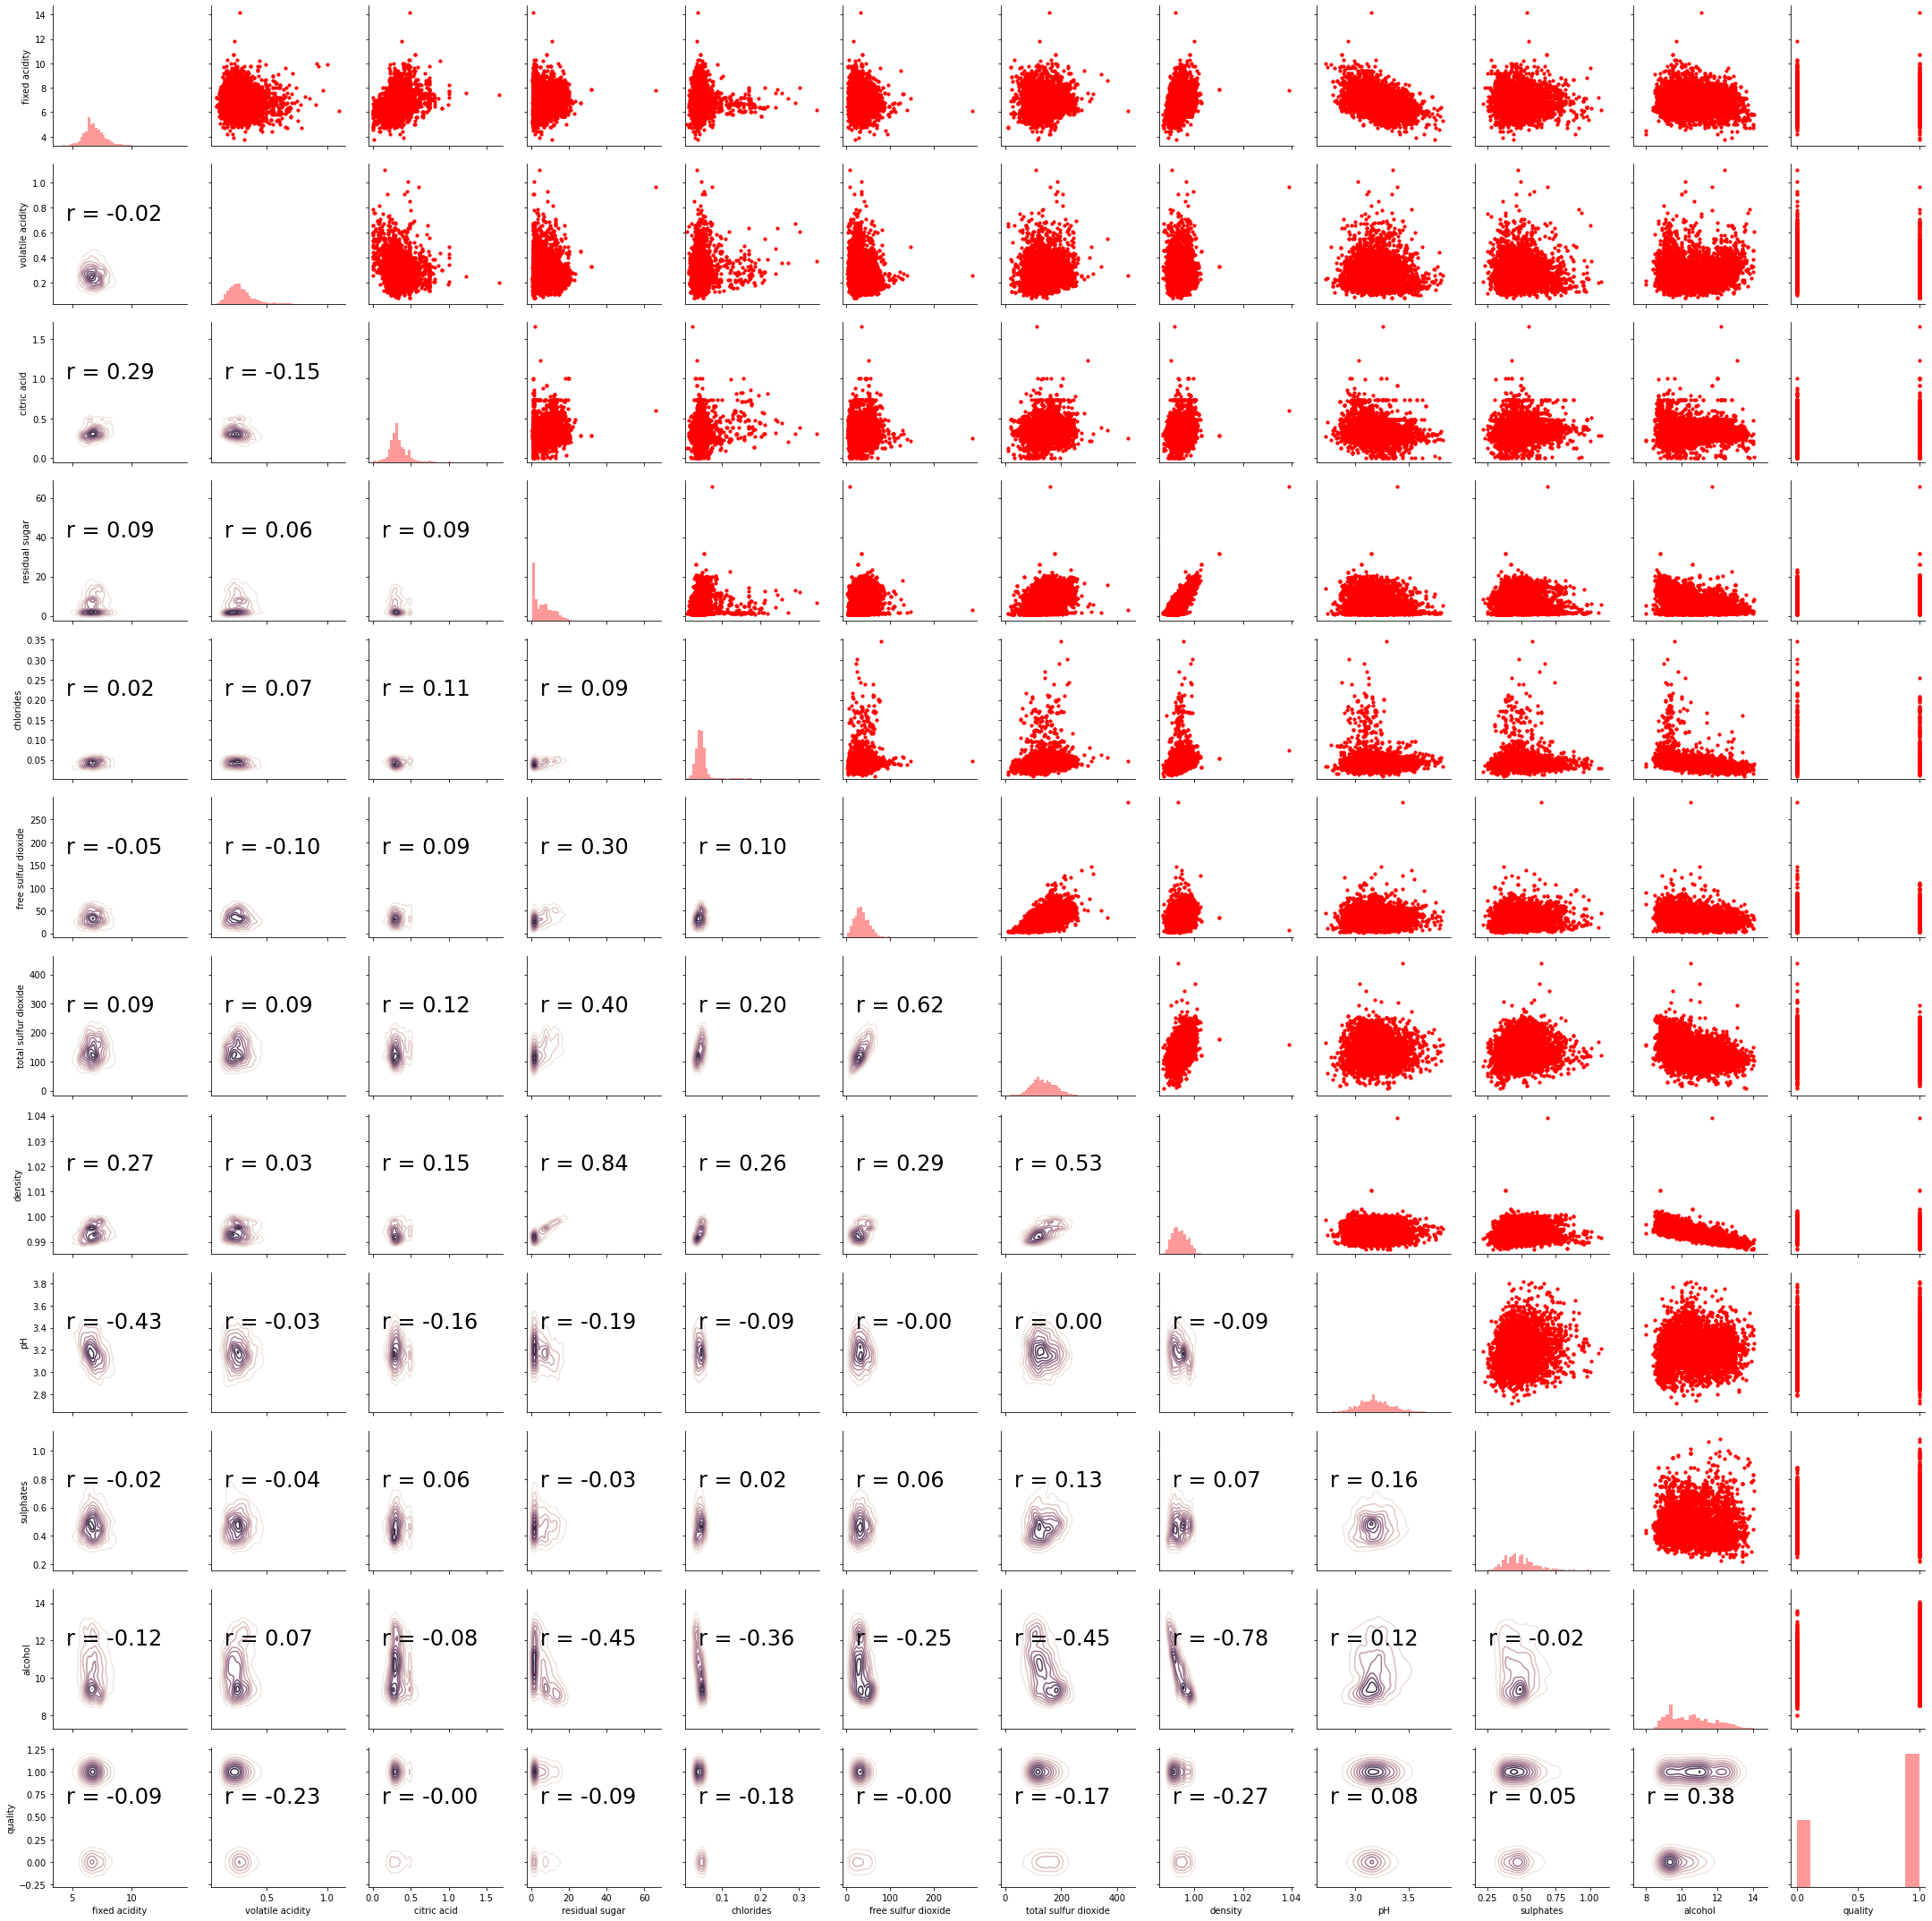

In [16]:
import warnings
warnings.filterwarnings('ignore')


# Matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from scipy import stats

# Calculate correlation coefficient
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.1, .6), xycoords=ax.transAxes,
               size = 24)
    
cmap = sns.cubehelix_palette(light=1, dark = 0.1,
                             hue = 0.5, as_cmap=True)

sns.set_context(font_scale=2)

# Pair grid set up
g = sns.PairGrid(df)

# Scatter plot on the upper triangle
g.map_upper(plt.scatter, s=10, color = 'red')

# Distribution on the diagonal
g.map_diag(sns.distplot, kde=False, color = 'red')

# Density Plot and Correlation coefficients on the lower triangle
g.map_lower(sns.kdeplot, cmap = cmap)
g.map_lower(corrfunc);

#### B(15) Drop the redundant features.

In [16]:
df = df.drop(labels=[ 'pH','volatile acidity','sulphates','citric acid'], axis = 1)

#### B(16) Write a function named “partition” to split your data into training and test set.

In [17]:
def partition(feature_matrix, target_vector, t):
    import math
    test_size = math.ceil(len(feature_matrix)* t)
    
    test_data = feature_matrix[:test_size]
    training_data = feature_matrix[test_size+1:]
    target_training_vec = training_data.index
    target_test_vec = test_data.index
    
    return training_data, test_data, target_training_vec, target_test_vec

In [18]:
training_data, test_data, target_training_vec, target_test_vec = partition(df, df, .2)
Training_data = training_data.values
Test_data = test_data.values

#### B(17) Naively run your KNN_Classifier model on the training dataset with n_neighbors = 5 and using Euclidean distance.

In [19]:
arguments = dict()
arguments['kwargs'] ={'distance':'eucledian_distance', 'confidence_interval':0.5}
arguments

{'kwargs': {'distance': 'eucledian_distance', 'confidence_interval': 0.5}}

In [20]:
A = KNN_Classifier()
arguments = dict()
arguments['kwargs'] = {'distance':'euclidean_distance', 'confidence_interval':0.5}
A.fit(Training_data, target_training_vec, 5, 'uniform', **arguments)
out = A.predict(Test_data)

#### B (17) a. Use accuracy and F1 score to compare your predictions to the expected labels.

In [21]:
Preci, Recall, f1 = precision(out ,Test_data[:, 7])
print('F1 score is: ', f1)

F1 score is:  0.695575221238938


#### B (17) b. Now standardize each feature of your training set (subtract mean and divide by standard deviation). Use the mean and standard deviation values for each feature in the training set to scale the test data.

In [22]:
Copy_data_frame = df.copy()
Save_training_data = training_data.copy()
Save_test_data = test_data.copy()
x = training_data.describe()
for (column, rows) in training_data.iteritems():
    for row in range(len(training_data)):
        training_data[column].iloc[row] = (training_data[column].iloc[row] - x[column].iloc[1])/x[column].iloc[2]
for (column, rows) in test_data.iteritems():
    for row in range(len(test_data)):
        test_data[column].iloc[row] = (test_data[column].iloc[row] - x[column].iloc[1])/x[column].iloc[2]
training_data['quality'] = Save_training_data['quality']
test_data['quality'] = Save_test_data['quality']
Training_data = training_data.values
Test_data = test_data.values

/usr/lib64/python3.8/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
<ipython-input-22-30c583944425>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column].iloc[row] = (training_data[column].iloc[row] - x[column].iloc[1])/x[column].iloc[2]
<ipython-input-22-30c583944425>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[column].il

##### B(17)c. Re-run the KNN_Classifier model on the standardized data, find the accuracy and F1 score with the expected labels.

In [23]:
B = KNN_Classifier()
arguments = dict()
arguments['kwargs'] = {'distance':'euclidean_distance', 'confidence_interval':0.5}
B.fit(Training_data, target_training_vec, 5, 'uniform', **arguments)
outB = B.predict(Test_data)

In [24]:
Preci, Recall, f1 = precision(out ,Test_data[:, 7])
print('F1 score is: ', f1)

F1 score is:  0.695575221238938


##### B(17)e. [Extra Credit for 353 and Mandatory for 795] Perform a similar test for inverse distance weighting in the KNN_Classifier model and determine whether or not to use it. This will go in the report.

In [25]:
training_data, test_data, target_training_vec, target_test_vec = partition(Copy_data_frame, Copy_data_frame, .2)
Training_data = training_data.values
Test_data = test_data.values

In [26]:
B = KNN_Classifier()
arguments = dict()
arguments['kwargs'] = {'distance':'euclidean_distance', 'confidence_interval':0.5}
B.fit(Training_data, target_training_vec, 5, 'distance', **arguments)
outB = B.predict(Test_data)

In [27]:
Preci, Recall, f1 = precision(out ,Test_data[:, 7])
print('F1 score is: ', f1)

F1 score is:  0.695575221238938


In [28]:
Save_training_data = training_data.copy()
Save_test_data = test_data.copy()
x = training_data.describe()
for (column, rows) in training_data.iteritems():
    for row in range(len(training_data)):
        training_data[column].iloc[row] = (training_data[column].iloc[row] - x[column].iloc[1])/x[column].iloc[2]
for (column, rows) in test_data.iteritems():
    for row in range(len(test_data)):
        test_data[column].iloc[row] = (test_data[column].iloc[row] - x[column].iloc[1])/x[column].iloc[2]
training_data['quality'] = Save_training_data['quality']
test_data['quality'] = Save_test_data['quality']
Training_data = training_data.values
Test_data = test_data.values

<ipython-input-28-53df5846977b>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_data[column].iloc[row] = (training_data[column].iloc[row] - x[column].iloc[1])/x[column].iloc[2]
<ipython-input-28-53df5846977b>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data[column].iloc[row] = (test_data[column].iloc[row] - x[column].iloc[1])/x[column].iloc[2]
<ipython-input-28-53df5846977b>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/st

In [29]:
arguments = dict()
arguments['kwargs'] ={'distance':'eucledian_distance', 'confidence_interval':0.5}
arguments

{'kwargs': {'distance': 'eucledian_distance', 'confidence_interval': 0.5}}

In [30]:
B = KNN_Classifier()
arguments = dict()
arguments['kwargs'] = {'distance':'euclidean_distance', 'confidence_interval':0.5}
B.fit(Training_data, target_training_vec, 5, 'distance', **arguments)
outB = B.predict(Test_data)

In [31]:
Preci, Recall, f1 = precision(out ,Test_data[:, 7])
print('F1 score is: ', f1)

F1 score is:  0.695575221238938


## Part C: Model Evaluation

#### C(18) Evaluation of an estimator performance via cross-validation: Implement the S-fold cross-validation function.

###### Standardization of the data (feature scaling).

In [32]:
df = Copy_data_frame.copy()
Save_df =df.copy()
x = df.describe()
for (column, rows) in df.iteritems():
    for row in range(len(df)):
        df[column].iloc[row] = (df[column].iloc[row] - x[column].iloc[1])/x[column].iloc[2]
df['quality'] = Save_df['quality']

In [33]:
def sFold(folds, data, labels, model, model_args, error_function):
    labels_list = labels['quality'].values # 
    data = data.values    
    
    # S-Fold division
    import math
    num_per_fold = math.ceil(len(data)/folds)    
    Test_partitions = []
    Training_partitions = []
    Expected_labels = []
    Predicted_labels =[]
    F1_scores = np.arange(folds)
    Expected_vector = np.array(0)
    Predicted_vector = np.array(0)

    for i in range(folds-1):
        Test_partitions.append(data[num_per_fold*i:num_per_fold+num_per_fold*i])
        Expected_labels.append(labels[num_per_fold*i:num_per_fold+num_per_fold*i]['quality'].values)
        if num_per_fold*i == 0 and len(data)/folds + len(data)/folds * i != len(data):
            Training_partitions.append(data[num_per_fold+num_per_fold*i:])
        elif num_per_fold*i != 0 and len(data)/folds + len(data)/folds * i != len(data):
            Training_partitions.append(np.concatenate((data[:num_per_fold*i], data[num_per_fold+num_per_fold*i:])))
    
    Training_partitions.append(data[:num_per_fold*(folds-1)])
    Test_partitions.append(data[num_per_fold*(folds-1):])
    Expected_labels.append(labels[num_per_fold*(folds-1):]['quality'].values)
    
    # Array containing all the predicted results for all 
    # Run the KNN_Classifier on the newly partion data
    # Return expected values, predicted labels, average error
    for data_in_partitions in range(folds):
        CLASIFIER_MODEL = model()
        CLASIFIER_MODEL.fit(Training_partitions[data_in_partitions],labels_list, **model_args)
        Predicted_labels.append(CLASIFIER_MODEL.predict(Test_partitions[data_in_partitions]))
     
    Expected_vector = np.concatenate((Expected_labels[0], Expected_labels[1]))
    Predicted_vector = np.concatenate((Predicted_labels[0], Predicted_labels[1]))
    for num in range(2, len(Expected_labels)):
        Expected_vector = np.concatenate((Expected_vector, Expected_labels[num]))
        Predicted_vector = np.concatenate((Predicted_vector, Predicted_labels[num]))
    #Error Calculation
    Error_ = 0
    error_list =[]
    for i in range(folds):
        pre, recall, f1 = precision(Expected_labels[i], Predicted_labels[i])
        error_list.append(f1)
    error_array = np.array(error_list)
    Error_ = np.sqrt(error_array.var()/folds) * 100
    
    # Return dictionary  
    dictionary = dict()
    dictionary["Expected_labels"] = Expected_vector
    dictionary["Predicted_labels"] = Predicted_vector
    dictionary["Error"] = Error_
    return dictionary

#### C(19) Use your sfold function to evaluate the performance of your model over each combination of k and distance metrics.

#### k=[1,5,9,11,21,31,41], distance = Manhattan, weights = uniform

In [34]:
k = [1,5,9,11,21,31,41]
dic_list_uniform_manhattan_distance = []
for i in range(7):
    print('K of: ', k[i])
    args = {'n_neighbors':k[i], 'weights':'uniform', 'kwargs':{'distance':'manhattan_distance', 'confidence_interval':0.5}}
    dic_list_uniform_manhattan_distance.append(sFold(5, df, df, KNN_Classifier,args, 'none'))
    print('Error is: ', dic_list_uniform_manhattan_distance[i]['Error'], '%')
    print('Accuracy: ', accuracy_generalization(dic_list_uniform_manhattan_distance[i]["Expected_labels"], dic_list_uniform_manhattan_distance[i]["Predicted_labels"]) * 100, ' %')

K of:  1
Error is:  0.5801131244924512 %
Accuracy:  78.6851776235198  %
K of:  5
Error is:  0.5863921734328602 %
Accuracy:  71.39648836259698  %
K of:  9
Error is:  0.5276523889890212 %
Accuracy:  69.86525112290731  %
K of:  11
Error is:  0.6247384476927867 %
Accuracy:  70.96774193548387  %
K of:  21
Error is:  0.6116681098420974 %
Accuracy:  69.96733360555328  %
K of:  31
Error is:  0.7301990318830869 %
Accuracy:  71.13107390771744  %
K of:  41
Error is:  0.7046441073003239 %
Accuracy:  70.02858309514087  %


##### Data fo the report

In [56]:
k = [1,5,9,11,21,31,41]
for i in range(7):
    Preci, Recall, f1 = precision(dic_list_uniform_manhattan_distance[i]["Expected_labels"], dic_list_uniform_manhattan_distance[i]["Predicted_labels"])
    print('K: ', k[i])
    print('Precision: ', Preci)
    print('Recall: ', Recall)
    print('F1: ', f1)

K:  1
Precision:  0.848987108655617
Recall:  0.833634719710669
F1:  0.8412408759124088
K:  5
Precision:  0.6884591774094536
Recall:  0.8531761125903385
F1:  0.7620180057754374
K:  9
Precision:  0.6494782074892572
Recall:  0.8636734693877551
F1:  0.7414155571128241
K:  11
Precision:  0.6850828729281768
Recall:  0.8493150684931506
F1:  0.7584097859327217
K:  21
Precision:  0.6611418047882136
Recall:  0.8544228480761602
F1:  0.7454576916421526
K:  31
Precision:  0.6955187231430325
Recall:  0.8430059523809523
F1:  0.7621930709720821
K:  41
Precision:  0.669122160834868
Recall:  0.8482490272373541
F1:  0.7481125600549073


#### k=[1,5,9,11,21,31,41], distance = Euclidean, weights = uniform

In [35]:
k = [1,5,9,11,21,31,41]
dic_list_uniform_euclidean_distance = []
for i in range(7):
    print('K of: ', k[i])
    args = {'n_neighbors':k[i], 'weights':'uniform', 'kwargs':{'distance':'euclidean_distance', 'confidence_interval':0.5}}
    dic_list_uniform_euclidean_distance.append(sFold(5, df, df, KNN_Classifier,args, 'none'))
    print('Error is: ', dic_list_uniform_euclidean_distance[i]['Error'], '%')
    print('Accuracy: ', accuracy_generalization(dic_list_uniform_euclidean_distance[i]["Expected_labels"], dic_list_uniform_euclidean_distance[i]["Predicted_labels"]) * 100, ' %')

K of:  1
Error is:  0.6662499383940284 %
Accuracy:  78.31768068599429  %
K of:  5
Error is:  0.7847900120306734 %
Accuracy:  71.04940792160065  %
K of:  9
Error is:  0.9365608563256647 %
Accuracy:  69.4365046957942  %
K of:  11
Error is:  0.6429701465432283 %
Accuracy:  70.7635769701919  %
K of:  21
Error is:  0.6384400349825726 %
Accuracy:  70.08983258472846  %
K of:  31
Error is:  0.551227470346907 %
Accuracy:  70.55941200489995  %
K of:  41
Error is:  0.4978251492702616 %
Accuracy:  69.31400571661904  %


##### Data for the report:

In [57]:
k = [1,5,9,11,21,31,41]
for i in range(7):
    Preci, Recall, f1 = precision(dic_list_uniform_euclidean_distance[i]["Expected_labels"], dic_list_uniform_euclidean_distance[i]["Predicted_labels"])
    print('K: ', k[i])
    print('Precision: ', Preci)
    print('Recall: ', Recall)
    print('F1: ', f1)

K:  1
Precision:  0.8446899938612645
Recall:  0.8319226118500604
F1:  0.838257691136156
K:  5
Precision:  0.6813996316758748
Recall:  0.8538461538461538
F1:  0.7579378627517924
K:  9
Precision:  0.6479435236341313
Recall:  0.8577813896789923
F1:  0.7382409512152475
K:  11
Precision:  0.6893799877225292
Recall:  0.8424606151537885
F1:  0.7582714382174207
K:  21
Precision:  0.6639042357274402
Recall:  0.8539281484405843
F1:  0.7470212398549473
K:  31
Precision:  0.6884591774094536
Recall:  0.8400749063670412
F1:  0.7567476383265856
K:  41
Precision:  0.6623695518723143
Recall:  0.8426395939086294
F1:  0.7417081972847568


#### k=[1,5,9,11], distance = Euclidean, weights = distance, Extra Credit: weights = [uniform, distance]

In [36]:
k = [1,5,9,11,21,31,41]
dic_list_distance_euclidean_distance = []
for i in range(7):
    print('K of: ', k[i])
    args = {'n_neighbors':k[i], 'weights':'distance', 'kwargs':{'distance':'euclidean_distance', 'confidence_interval':0.5}}
    dic_list_distance_euclidean_distance.append(sFold(5, df, df, KNN_Classifier,args, 'none'))
    print('Error is: ', dic_list_distance_euclidean_distance[i]['Error'], '%')
    print('Accuracy: ', accuracy_generalization(dic_list_distance_euclidean_distance[i]["Expected_labels"], dic_list_distance_euclidean_distance[i]["Predicted_labels"]) * 100, ' %')

K of:  1
Error is:  0.6662499383940284 %
Accuracy:  78.31768068599429  %
K of:  5
Error is:  0.49296843491642695 %
Accuracy:  78.03184973458555  %
K of:  9
Error is:  0.7200822114096993 %
Accuracy:  78.39934667211107  %
K of:  11
Error is:  0.5431514713045901 %
Accuracy:  78.60351163740302  %
K of:  21
Error is:  0.4505567355557717 %
Accuracy:  78.86892609228256  %
K of:  31
Error is:  0.40065494320182155 %
Accuracy:  78.86892609228256  %
K of:  41
Error is:  0.5039767950798267 %
Accuracy:  78.97100857492855  %


##### Data for the report

In [58]:
k = [1,5,9,11,21,31,41]
for i in range(7):
    Preci, Recall, f1 = precision(dic_list_distance_euclidean_distance[i]["Expected_labels"], dic_list_distance_euclidean_distance[i]["Predicted_labels"])
    print('K: ', k[i])
    print('Precision: ', Preci)
    print('Recall: ', Recall)
    print('F1: ', f1)

K:  1
Precision:  0.8446899938612645
Recall:  0.8319226118500604
F1:  0.838257691136156
K:  5
Precision:  0.7759361571516268
Recall:  0.8796102992345164
F1:  0.8245270711024135
K:  9
Precision:  0.7900552486187845
Recall:  0.8731343283582089
F1:  0.8295198195294876
K:  11
Precision:  0.7857581338244322
Recall:  0.8797250859106529
F1:  0.8300907911802854
K:  21
Precision:  0.7851442602823818
Recall:  0.8842032492222607
F1:  0.8317346772882458
K:  31
Precision:  0.7842234499693064
Recall:  0.885001731901628
F1:  0.8315703824247356
K:  41
Precision:  0.7839165131982812
Recall:  0.8868055555555555
F1:  0.8321928967090257


#### k=[1,5,9,11,21,31,41], distance = Manhattan, weights = distance, Extra Credit: weights = [uniform, distance]

In [37]:
k = [1,5,9,11,21,31,41]
dic_list_distance_manhattan_distance = []
for i in range(7):
    print('K of: ', k[i])
    args = {'n_neighbors':k[i], 'weights':'distance', 'kwargs':{'distance':'manhattan_distance', 'confidence_interval':0.5}}
    dic_list_distance_manhattan_distance.append(sFold(5, df, df, KNN_Classifier,args, 'none'))
    print('Error is: ', dic_list_distance_manhattan_distance[i]['Error'], '%')
    print('Accuracy: ', accuracy_generalization(dic_list_distance_manhattan_distance[i]["Expected_labels"], dic_list_distance_manhattan_distance[i]["Predicted_labels"]) * 100, ' %')

K of:  1
Error is:  0.5801131244924512 %
Accuracy:  78.6851776235198  %
K of:  5
Error is:  0.4236900275716139 %
Accuracy:  78.35851367905268  %
K of:  9
Error is:  0.5307505698293523 %
Accuracy:  79.13434054716211  %
K of:  11
Error is:  0.4527460566615343 %
Accuracy:  78.74642711310739  %
K of:  21
Error is:  0.4736523036847621 %
Accuracy:  79.35892200898326  %
K of:  31
Error is:  0.6766041167096042 %
Accuracy:  79.84891792568395  %
K of:  41
Error is:  0.4929301242787116 %
Accuracy:  79.72641894650879  %


##### Data for the report

In [59]:
k = [1,5,9,11,21,31,41]
for i in range(7):
    Preci, Recall, f1 = precision(dic_list_distance_manhattan_distance[i]["Expected_labels"], dic_list_distance_manhattan_distance[i]["Predicted_labels"])
    print('K: ', k[i])
    print('Precision: ', Preci)
    print('Recall: ', Recall)
    print('F1: ', f1)

K:  1
Precision:  0.848987108655617
Recall:  0.833634719710669
F1:  0.8412408759124088
K:  5
Precision:  0.7851442602823818
Recall:  0.8766278272789582
F1:  0.8283678756476683
K:  9
Precision:  0.7974217311233885
Recall:  0.8777027027027027
F1:  0.8356384689610807
K:  11
Precision:  0.7866789441375077
Recall:  0.8810587830869715
F1:  0.83119831360467
K:  21
Precision:  0.7888275015346838
Recall:  0.8883511925337021
F1:  0.8356364818728662
K:  31
Precision:  0.7940454266421118
Recall:  0.8911470892180503
F1:  0.8397987339717579
K:  41
Precision:  0.7909760589318601
Recall:  0.8920041536863966
F1:  0.838457784285017


##### C(20) Evaluate your model on the test data and report the performance measures.

In [46]:
Preci, Recall, f1 = precision(dic_list_distance_euclidean_distance[5]["Expected_labels"], dic_list_distance_euclidean_distance[5]["Predicted_labels"])
accuracy = accuracy_generalization(dic_list_distance_euclidean_distance[5]["Expected_labels"], dic_list_distance_euclidean_distance[5]["Predicted_labels"])
print('Parameters chosen based on the lowest error: k = 11, distance = manhattan, weights = distance.')
print(" ")
print('Precision: ', Preci)
print('Recall: ', Recall)
print('F1: ', f1)
print(" ")
print('              Confusion Matrix')
matrix = confusion_matrix(dic_list_distance_euclidean_distance[5]["Expected_labels"], dic_list_distance_euclidean_distance[5]["Predicted_labels"])
print('Accuracy: ', accuracy)
print('Generalization: ', 1 - accuracy)

Parameters chosen based on the lowest error: k = 11, distance = manhattan, weights = distance.
 
Precision:  0.7842234499693064
Recall:  0.885001731901628
F1:  0.8315703824247356
 
              Confusion Matrix
      Predicted: NO      Predicted: YES 
 
Actual: NO      1308        703
 
Actual: YES      332        2555
 
Accuracy:  0.7886892609228257
Generalization:  0.21131073907717435


##### C(21) Generate the ROC curve and determine the optimal threshold. This will go in your report.

In [47]:
confidence_intervals = [0,.1, .2, .3, .4, .5, .6, .7, .8, .9, 1]
dic_list = []
for i in range(11):
    args = {'n_neighbors':11, 'weights':'distance', 'kwargs':{'distance':'euclidean_distance', 'confidence_interval':confidence_intervals[i]}}
    dic_list.append(sFold(5, df, df, KNN_Classifier,args, 'none'))

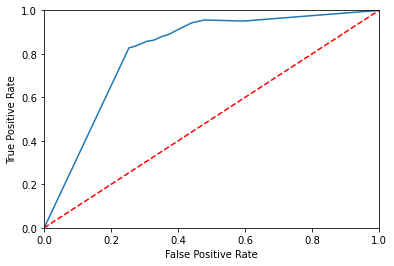

In [49]:
sort_values_list = []
confusion_matrix_list = []
for i in range(len(confidence_intervals)):
    confusion_matrix_list.append(confusion_matrix(dic_list[i]["Expected_labels"], dic_list[i]["Predicted_labels"]))
    #Matrix lists TN,FP,FN, TP
    #[FPR,TPR]
    sort_values_list.append([confusion_matrix_list[i][1]/(confusion_matrix_list[i][0] + confusion_matrix_list[i][1]), confusion_matrix_list[i][3]/(confusion_matrix_list[i][2] + confusion_matrix_list[i][3])])

# Sort values by FPR
sort_values_list.sort()
TPR = []
FPR = []
TPR.append(0)
FPR.append(0)
for i in range(len(confidence_intervals)):
    TPR.append(sort_values_list[i][1])
    FPR.append(sort_values_list[i][0])

TPR.append(1)
FPR.append(1)   
   
roc(TPR, FPR)

##### C(22) Compute the AUC score.

In [50]:
AUC_TPR = []
AUC_FPR = []
for i in range(len(confidence_intervals)):
    AUC_TPR.append(sort_values_list[i][1])
    AUC_FPR.append(sort_values_list[i][0])

auc(AUC_TPR, AUC_FPR)

AUC is : 0.6955969394731731


0.6955969394731731

##### C(23) [Extra Credit] Generate precision-recall curve and determine the optimal treshold.

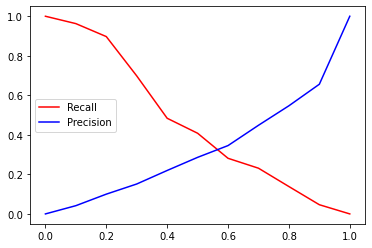

In [51]:
for i in range(len(confidence_intervals)):
    confusion_matrix_list.append(confusion_matrix(dic_list[i]["Expected_labels"], dic_list[i]["Predicted_labels"]))
    sort_values_list.append([confusion_matrix_list[i][3]/(confusion_matrix_list[i][1] + confusion_matrix_list[i][3]), confusion_matrix_list[i][3]/(confusion_matrix_list[i][2] + confusion_matrix_list[i][3])])


recall_= []
precision_ = []

for i in range(len(confidence_intervals)):
    recall_.append(sort_values_list[i][1])
    precision_.append(sort_values_list[i][0])
precision_.sort()
recall_.sort(reverse=True)

# Data Normalization
recall_min = min(recall_)
recall_max = max(recall_)
precision_min = min(precision_)
precision_max = max(precision_)

for j  in range(len(confidence_intervals)):
    precision_[j] = (precision_[j] - precision_min)/(precision_max - precision_min)
    recall_[j] = (recall_[j] - recall_min)/(recall_max - recall_min)

precision_recall(recall_, precision_)

##### C(24) Calculate and report the 95% confidence interval on the generalization error estimate.

In [65]:
def sFold(folds, data, labels, model, model_args, error_function):
    labels_list = labels['quality'].values # 
    data = data.values    
    
    # S-Fold division
    import math
    num_per_fold = math.ceil(len(data)/folds)    
    Test_partitions = []
    Training_partitions = []
    Expected_labels = []
    Predicted_labels =[]
    F1_scores = np.arange(folds)
    Expected_vector = np.array(0)
    Predicted_vector = np.array(0)

    for i in range(folds-1):
        Test_partitions.append(data[num_per_fold*i:num_per_fold+num_per_fold*i])
        Expected_labels.append(labels[num_per_fold*i:num_per_fold+num_per_fold*i]['quality'].values)
        if num_per_fold*i == 0 and len(data)/folds + len(data)/folds * i != len(data):
            Training_partitions.append(data[num_per_fold+num_per_fold*i:])
        elif num_per_fold*i != 0 and len(data)/folds + len(data)/folds * i != len(data):
            Training_partitions.append(np.concatenate((data[:num_per_fold*i], data[num_per_fold+num_per_fold*i:])))
    
    Training_partitions.append(data[:num_per_fold*(folds-1)])
    Test_partitions.append(data[num_per_fold*(folds-1):])
    Expected_labels.append(labels[num_per_fold*(folds-1):]['quality'].values)
    
    # Array containing all the predicted results for all 
    # Run the KNN_Classifier on the newly partion data
    # Return expected values, predicted labels, average error
    for data_in_partitions in range(folds):
        CLASIFIER_MODEL = model()
        CLASIFIER_MODEL.fit(Training_partitions[data_in_partitions],labels_list, **model_args)
        Predicted_labels.append(CLASIFIER_MODEL.predict(Test_partitions[data_in_partitions]))
     
    Expected_vector = np.concatenate((Expected_labels[0], Expected_labels[1]))
    Predicted_vector = np.concatenate((Predicted_labels[0], Predicted_labels[1]))
    for num in range(2, len(Expected_labels)):
        Expected_vector = np.concatenate((Expected_vector, Expected_labels[num]))
        Predicted_vector = np.concatenate((Predicted_vector, Predicted_labels[num]))
    #Error Calculation
    Error_ = 0
    error_list =[]
    for i in range(folds):
        accuracy = accuracy_generalization(Expected_labels[i], Predicted_labels[i])
        error_list.append(1 - accuracy)
    error_array = np.array(error_list)
    Error_ = error_array.mean() + 2.132*(error_array.std()/np.sqrt(folds))
    
    # Return dictionary  
    dictionary = dict()
    dictionary["Expected_labels"] = Expected_vector
    dictionary["Predicted_labels"] = Predicted_vector
    dictionary["Error"] = Error_
    return dictionary

In [66]:
Interval = []
args = {'n_neighbors':k[i], 'weights':'distance', 'kwargs':{'distance':'manhattan_distance', 'confidence_interval':0.5}}
Interval.append(sFold(5, df, df, KNN_Classifier,args, 'none'))

In [67]:
print('95% confidence interval on the generalization error estimate is: ', Interval[0]["Error"])

95% confidence interval on the generalization error estimate is:  0.2148146250782309


## Part D: Written Report Section

#### 25) Data summary:
I. White wine data set includes eleven attributes (fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, alcohol) and an output variable (quality). KNN classifier estimates a target function by two distance measures: euclidean distance, manhattan distance and by two weight functions: uniform (all neighbors are weighted equally) or distance (weights are dependent on inverse of their distance).

II.

In [69]:
df = Copy_data_frame.copy()
df.describe()

,fixed acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,-0.002338,-0.000954,0.002486,0.003317,0.025984,0.002860,-0.005009,0.665169
std,0.994870,0.998980,0.996617,1.127155,2.011856,0.986119,1.008257,0.471979
min,-3.580944,-1.136363,-1.675069,-1.953778,-3.056371,-2.277815,-2.037433,0.000000
25%,-0.653365,-0.920994,-0.443407,-0.724624,-0.716561,-0.757204,-0.826215,0.000000
50%,-0.067849,-0.235726,-0.124087,-0.080781,-0.102065,-0.092091,-0.099484,1.000000
75%,0.517667,0.684490,0.195232,0.621593,0.677872,0.685935,0.707995,1.000000
max,8.597785,11.629191,13.697897,37.000000,122.000000,14.822263,12.000000,1.000000


III. Standardization didn’t show any improvement in error given k = 5, distance = [euclidean distance, manhattan distance] and weight = [uniform, distance]. However, standardization was used because it improved accuracy in classifier using distance weight function.

IV. Output variable has a high correlation with alcohol content. Therefore, pH was dropped due to its high correlation to alcohol. Other features like sulphates, and citric acid were dropped due to their low correlation with output variable. Volatile acidity acidity was dropped to decrease the amount of dimensions.


#### 26) Method:

I. Brute force KNN classifier has the run time complexity of O(a * b). Where a represents the number of rows in the validation set, and b is the number of dimensions. Since a is much larger than b run time complexity can be reduced to O(a).

II. There is a significant decrease in accuracy when k > 1 (~7 - 8%). This effect is observed only in the classifiers that used both distance functions and the uniform weight function. It doesn’t happen to the classifier that uses the distance weight function.

III. KNN classifier shows a significant improvement in accuracy  when the distance functions are coupled with distance weight function (~10%).

#### 27)Results:

![title](first.png)
![title](second.png)

I. For all k’s error fluctuated between 0.95 > error > 0.40. Including a larger k proved to have a positive effect on error as well as accuracy. Another major difference was observed between the two distance weights. Distance weight proved to produce a better accuracy than uniform weight. Both distance measures performed similarly when paired with the same weight function.

II. In this case any error below 1% is acceptable because misclassification of wine quality has small consequences. However, accuracy never reached 80%, that means that this classifier isn’t able to efficiently separate data into two categories. Perhaps a reducing covariance of certain features would further improve the performance of the classifier.

III. Both classifiers that use distance weight function produce high accuracy as well as high F1 score which means that both precision and recall are high. These classifiers are good only in a situation if we want to maximize both precision and recall. That also comes with higher accuracy. On another hand, the other two classifiers have a higher recall than precision and can be used in situations that we would like to capture all good wines. These two classifiers have a lesser accuracy that makes them less desirable. 
